# RFI Inspection Daily RTP Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
from copy import deepcopy
from pyuvdata import UVFlag
import matplotlib.colors as colors

%matplotlib inline

In [2]:
# Use environment variables to figure out path to data
JD = os.environ['JULIANDATE']
data_path = os.environ['DATA_PATH']
print(f'JD = {JD}')
print(f'data_path = "{data_path}"')
JD = int(JD)

JD = 2458838
data_path = "/lustre/aoc/projects/hera/jsdillon/H4C_RTP/2458838"


# Show full day of flags

In [3]:
uvf = UVFlag(f'{data_path}/zen.{JD}.total_stage_1_threshold_flags.h5')

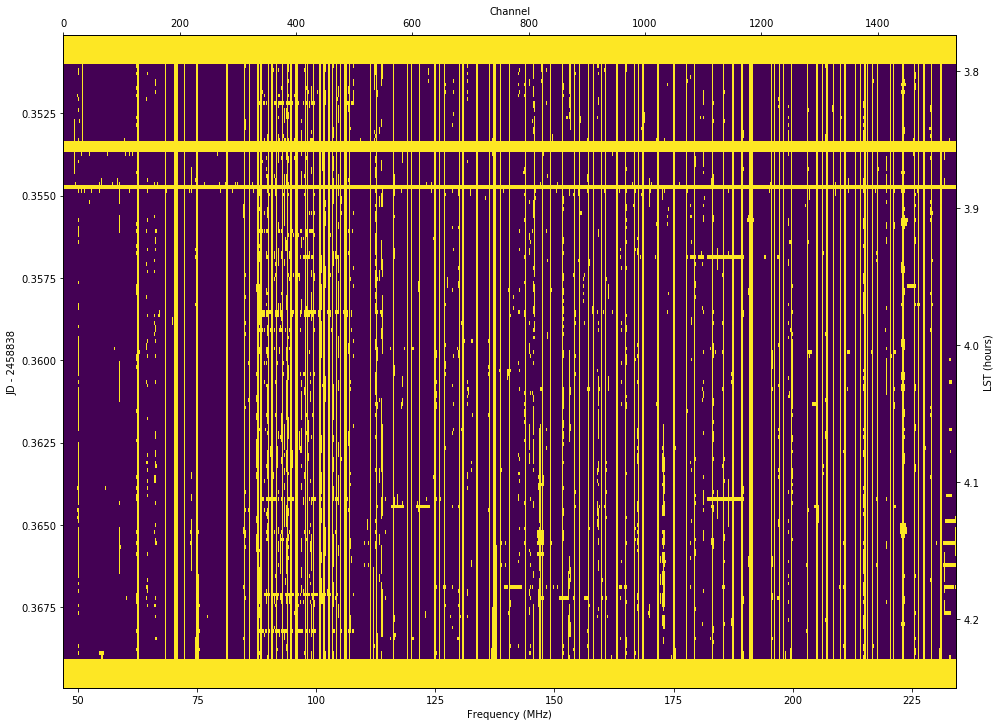

In [4]:
plt.figure(figsize=(16,12))
plt.imshow(uvf.flag_array[:,:,0], aspect='auto',
           extent=[uvf.freq_array[0] / 1e6, uvf.freq_array[-1] / 1e6, 
                   uvf.time_array[-1] - JD, uvf.time_array[0] - JD])
plt.xlabel('Frequency (MHz)')
plt.ylabel(f'JD - {JD}')
ax2 = plt.gca().twinx()
ax2.set_ylim([uvf.lst_array[0] * 12 / np.pi, uvf.lst_array[-1] * 12 / np.pi])
ax2.invert_yaxis()
ax2.set_ylabel('LST (hours)')
ax3 = plt.gca().twiny()
ax3.set_xlim([0, uvf.Nfreqs - 1])
ax3.set_xlabel('Channel');

## Figure 1: RFI Flags
Yellow means flagged, blue is unflagged.

In [5]:
xrfi_dirs = sorted(glob.glob(f'{data_path}/zen.{JD}.?????.stage_1_xrfi'))
print(f'Found {len(xrfi_dirs)} directories containing XRFI intermediate data products.')
files1 = [glob.glob(f'{d}/*combined_metrics1.h5')[0] for d in xrfi_dirs]
print(f'Found {len(files1)} combined round 1 XRFI metrics files.')
files2 = [glob.glob(f'{d}/*combined_metrics2.h5')[0] for d in xrfi_dirs]
print(f'Found {len(files2)} combined round 2 XRFI metrics files.')
uvf1 = UVFlag(files1)
uvf2 = UVFlag(files2)
uvf2.metric_array = np.where(np.isinf(uvf2.metric_array), uvf1.metric_array,
                             uvf2.metric_array)

Found 89 directories containing XRFI intermediate data products.
Found 89 combined round 1 XRFI metrics files.
Found 89 combined round 2 XRFI metrics files.


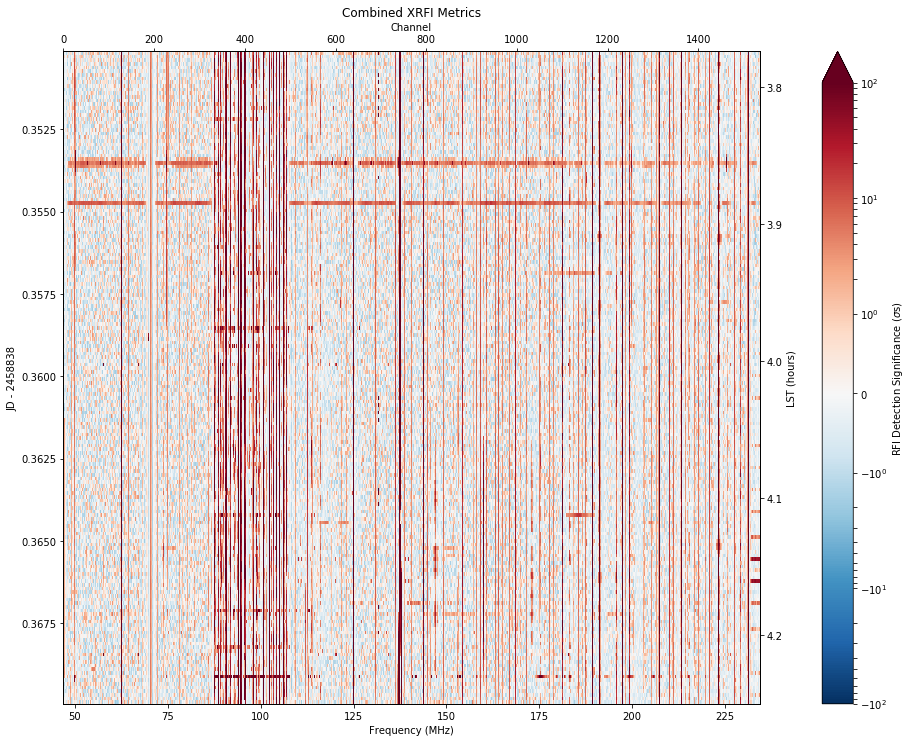

In [6]:
plt.figure(figsize=(16,12))
max_abs = 100
if np.max(uvf2.metric_array) > max_abs:
    extend = 'max'
    if np.min(uvf2.metric_array) < -max_abs:
        extend = 'both'
elif np.min(uvf2.metric_array) < -max_abs:
    extend = 'min'    
else:
    extend = 'neither'

plt.imshow(uvf2.metric_array[:,:,0], aspect='auto', cmap='RdBu_r',
           norm=colors.SymLogNorm(linthresh=1,vmin=-max_abs, vmax=max_abs), 
           extent=[uvf.freq_array[0] / 1e6, uvf.freq_array[-1] / 1e6, 
                   uvf.time_array[-1] - JD, uvf.time_array[0] - JD])
plt.colorbar(pad=.07, extend=extend,
             label='RFI Detection Significance ($\sigma$s)')
plt.title('Combined XRFI Metrics')
plt.xlabel('Frequency (MHz)')
plt.ylabel(f'JD - {JD}')
ax2 = plt.gca().twinx()
ax2.set_ylim([uvf.lst_array[0] * 12 / np.pi, uvf.lst_array[-1] * 12 / np.pi])
ax2.invert_yaxis()
ax2.set_ylabel('LST (hours)')
ax3 = plt.gca().twiny()
ax3.set_xlim([0, uvf.Nfreqs - 1])
ax3.set_xlabel('Channel');

## Figure 2: Combined XRFI Detection Significance
This figure shows round 2 XRFI metrics (mean filter outliers) combined in quadrature. When flagged in round 1 of XRFI, round 1's combined median filter metrics are used instead. 

# Metadata

In [7]:
from hera_qm import version
print(version.construct_version_info())

{'version': '1.0', 'git_origin': 'git@github.com:HERA-Team/hera_qm.git', 'git_hash': '4f54c6857caf4984e4aa70c181c28ccd9c7cc053', 'git_description': 'v1.1-201-g4f54c68', 'git_branch': 'master'}
